This question is based on Glosten-Milgrom (1985) model of information asymmetry in trading. The setting is as follows:
- The market maker(MM) quotes a bid B and ask A at time t=0; 
- The security has intrinsic value V=VH (with probability p ) or VL (with probability 1-p), VH > VL;
- At time t=0, traders (including informed traders and liquidity traders) take action S (buy/sell one share of the security from MM).  
- The proportion of informed traders is α and the proportion of liquidity trades is 1- α;
- Informed traders know V at t=0;
- Liquidity traders buy and sell with equal probabilities.
- MM does not know whether the order comes from an informed trader or a liquidity trader.
    - What are the probabilities that MM receives a coming buy order if  V=VH and V= VL respectively?
    - What are the probabilities that MM receives a coming sell order if  V=VH and V= VL respectively?
    - According to Bayes Theorem, What is the probability that V=VH given that MM receives a buy order? What is the probability that V= VL given that MM receives a buy order?
    - According to Bayes Theorem, What is the probability that V=VH given that MM receives a sell order? What is the probability that V= VL given that MM receives a sell order?
    - If competition among MMs narrows their profit to 0, which means A equals to the expected value of V if the coming order is to buy (and thus the MM is to sell) , what is A?
    - If competition among MMs narrows their profit to 0, which means B equals to the expected value of V if the coming order is to sell (and thus the MM is to buy), what is B?
    - Assume that time is discrete, trading happens sequentially at t=0,1,2,3,4…. After each trade, the MM updates beliefs about V and sets A and B. What is A(k+l) and B(k+l) after k buys and l sells?
    - If p=0.2, α=0.8, simulate the case (for at least 50 times) if V=VH =2 (while VL =1). Plot A and B against time.

In [247]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Parameters
p = 0.2
alpha = 0.8
VH = 2
VL = 1
periods = 100

In [248]:
# single simulation

def simulate(p, alpha, VH, VL, periods):
    k, l = 0, 0
    ACTIONS = [''] * periods
    A = [0] * periods
    B = [0] * periods
    
    for i in range(periods):
        next_action = random.choice(['B', 'S']) # randomly pic B for buy or S for sell
        ACTIONS[i] = next_action
        if next_action == 'B':
            k += 1
        else:
            l += 1
        
        A[i] = (((alpha + 1)**(k+1) * (1 - alpha)**l * p * VH) + ((1 - alpha)**(k+1) * (alpha + 1)**l * (1-p) * VL))/\
            ((p * (1+alpha)**(k+1) * (1-alpha)**l) + ((1-p) * (1-alpha)**(k+1) * (1+alpha)**l))
        B[i] = (((alpha + 1)**(k) * (1 - alpha)**(l+1) * p * VH) + ((1 - alpha)**(k) * (alpha + 1)**(l+1) * (1-p) * VL))/\
            ((p * (1+alpha)**(k) * (1-alpha)**(l+1)) + ((1-p) * (1-alpha)**(k) * (1+alpha)**(l+1)))
        
    return A, B, ACTIONS

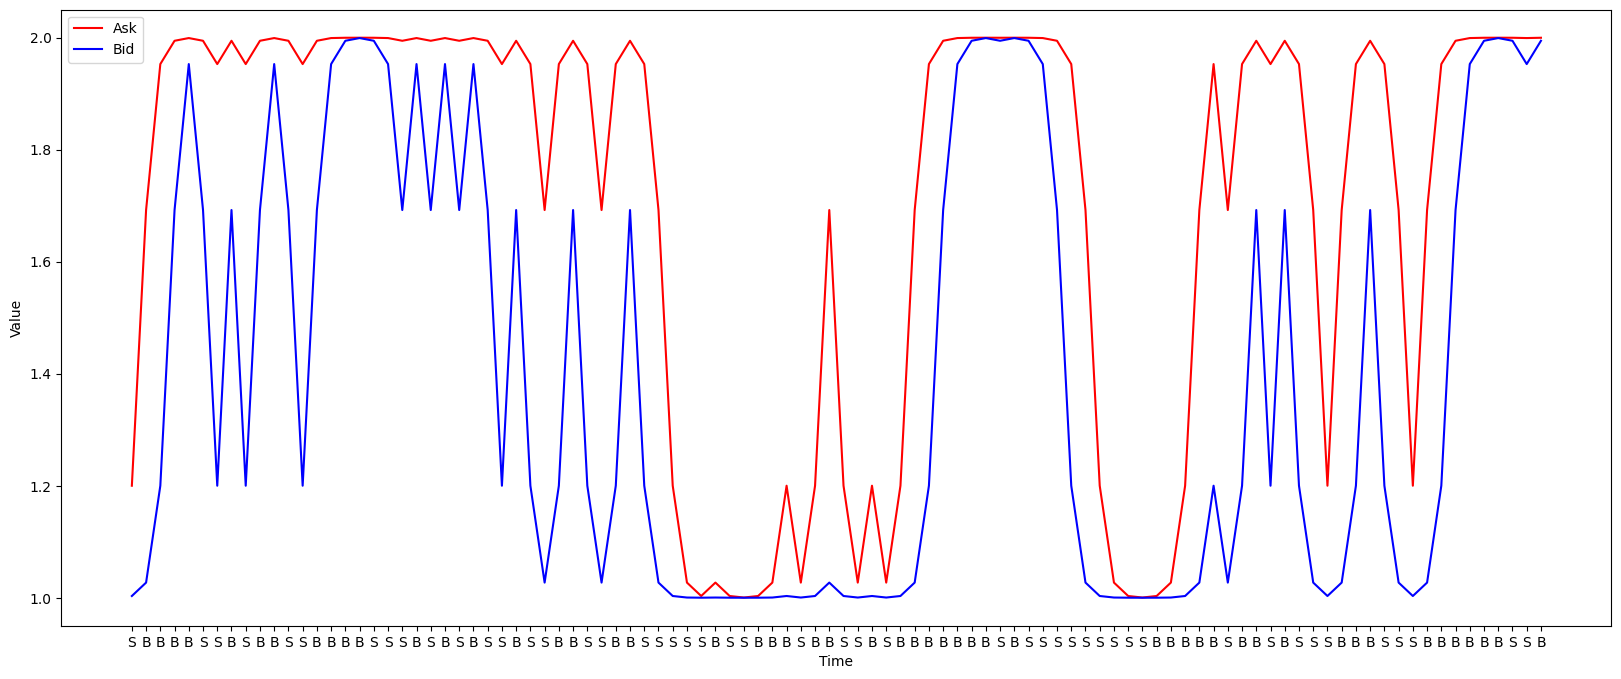

In [249]:
A, B, ACTIONS = simulate(p, alpha, VH, VL, periods)
plt.figure(figsize=(20, 8))
plt.plot(A, color='red', label='Ask')
plt.plot(B, color='blue', label='Bid')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(range(len(ACTIONS)), ACTIONS)  # Set x-axis labels
plt.legend()
plt.show()


In [250]:
CUMULATIVE_A = np.zeros(periods)
CUMULATIVE_B = np.zeros(periods)
SIMULATIONS = 10000

# Run the simulation 10000 times
for _ in range(SIMULATIONS):
    A, B, _ = simulate(p, alpha, VH, VL, periods)
    CUMULATIVE_A += np.array(A)
    CUMULATIVE_B += np.array(B)

# Calculate the average A and B values
AVG_A = CUMULATIVE_A / SIMULATIONS
AVG_B = CUMULATIVE_B / SIMULATIONS

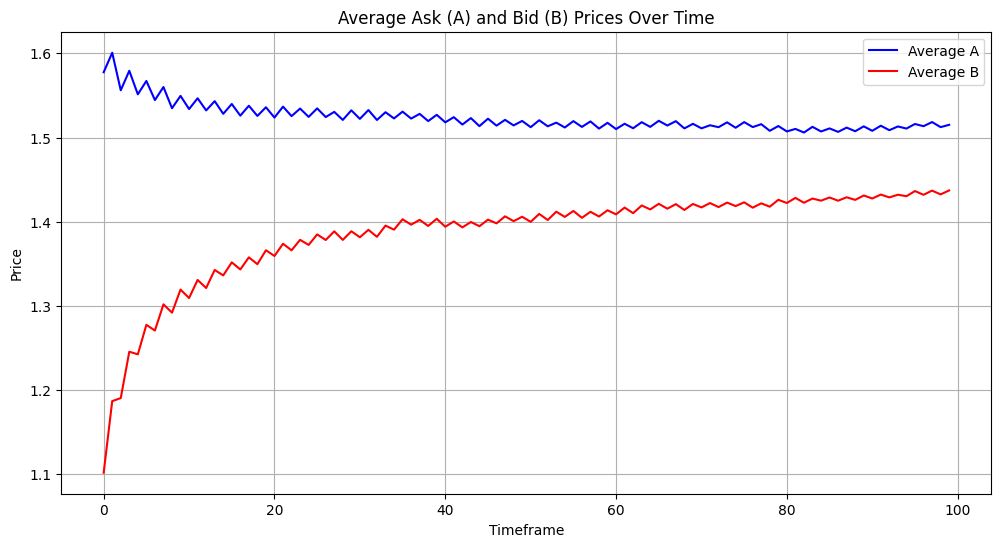

In [251]:
timeframes = range(periods)
plt.figure(figsize=(12, 6))
plt.plot(timeframes, AVG_A, label='Average A', color='blue')
plt.plot(timeframes, AVG_B, label='Average B', color='red')
plt.xlabel('Timeframe')
plt.ylabel('Price')
plt.title('Average Ask (A) and Bid (B) Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()